In [1]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")
sys.path.insert(0, "./src/")

In [2]:
import numpy as np
import pandas as pd
from scipy import signal
from matplotlib import pyplot as plt
from de_run import modelo_c

# Modelos
Esquema general de los tres modelos presentados en [1] (p19). 

![diagrama modelo](./img/diag_1.png)

---
### Modelo c:


$$G(s) = \frac{1+T_ds}{1+T_cs+T_bs^2}~~~~~\longrightarrow~~~~~\dot x = \begin{bmatrix} 0 & 0 & 0 & -\frac1{K}\\ \frac{K_d}{T_b} & 0 & -\frac1{T_b} & 0 \\ \frac{K_dT_d}{T_b} & 1 & -\frac{T_c}{T_b} & 0 \\ 0 & 0 & \frac1{T_a} & -\frac1{T_a}\end{bmatrix}x + \begin{bmatrix}-\frac1{K}\\0\\0\\0\end{bmatrix}\Delta P_k;~~~\Delta f = \begin{bmatrix} 1 & 0 & 0 & 0\end{bmatrix}x$$

---

Ejemplos de simulación con los parámetros de [1] (p22-25).  
Obs: notar en las tablas que las unidades no son consistentes. ¿son las $T_i$ adimensionales? creo que no... 

|                     | Ta | Tb     | Tc  | Td    | K (GWs) | Kd (MW/0.1Hz) | Loss (MW) | Load (MW) |
|---------------------|----|--------|-----|-------|--------|----------------|-----------|-----------|
|  520 MW-contingency | 1  | -1e-10 | 506 | -6e12 | 183.6  | 580            | 520       | 31422     |
|  800 MW-contingency | 1  | -1e-7  | 567 |  1e10 | 369.5  | 869            | 800       | 47550     |
| 1100 MW-contingency | 1  | -1e6   | 657 | -9e8  | 262.1  | 777            | 1100      | 37400     |



[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

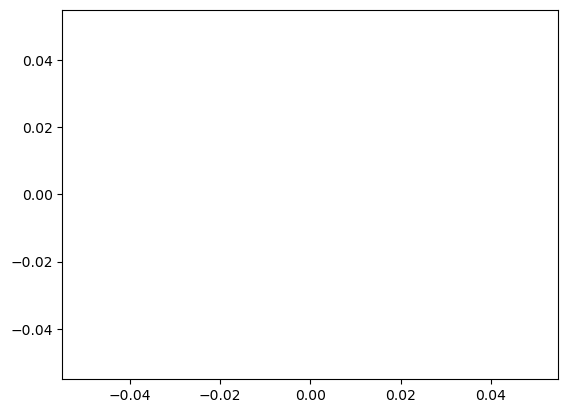

In [33]:
## 520 MW-contingency

Ta = 1
Tb = -1e-10
Tc = 506
Td = -6e12
K  = 183.6 
Kd = 580 
P = 520 ## Es Loss=520 o Load=31422?? 
x0 = 0 ## Este dato no esta! creo que no da lo mismo!


#model_params = (Ta, Tb, Tc, Td, K , Kd) # Talco
#model_params = (Ta, Tb, Tc, Td, K / 1e3, Kd * 10) # Todo en MW y Hz
model_params = (Ta, Tb, Tc, Td, K / 1e9, Kd * 10 / 1e6);  P = P / 1e6 # Todo en W y Hz

Ts = 0.3
N = 250

sim_power = P * np.repeat(1, N)

sys = modelo_c(model_params, Ts)

sim = signal.dlsim(sys, sim_power, x0 = x0)
sim_freq = sim[1].ravel()
sim_time = np.linspace(0, N*Ts, num=sim_freq.size)
print(sim_freq)
plt.plot(sim_time, sim_freq)

---

Ejemplos de simulación con los parámetros de [2] (p35).  


|                | Ta (s) | Tb (s) | Tc (s) | Td (s) | K (GWs) | Kd (MW/0.1Hz) | P (MW) | D (MW)  |
|----------------|--------|--------|--------|--------|---------|---------------|--------|---------|
| (2) 09-03-2018 | 0.0002 | 42.146 | 19.966 | 5.569  | 70.103  | 208.834       | 128    | 7154.18 |



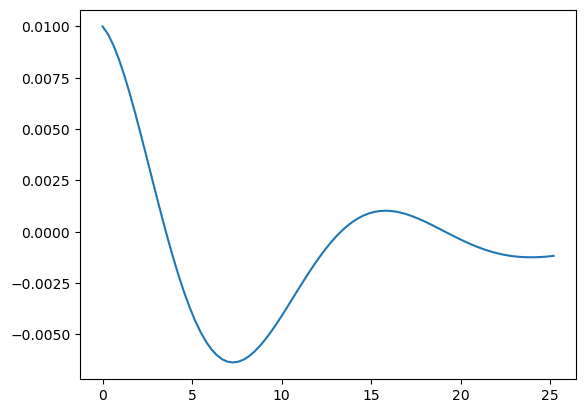

In [129]:
## (2) 09-03-2018

Ta = 0.0002
Tb = 42.146
Tc = 19.966	
Td = 5.569

Kd = 208.834
P = 128 ## Es P=128 o D=7154.18?? 
x0 = .01 ## Este dato no esta! creo que no da lo mismo!

K  = 70.103 * 2/50 /0.02
#model_params = (Ta, Tb, Tc, Td, K, Kd) # Talco
#model_params = (Ta, Tb, Tc, Td, K / 1e3, Kd) # Todo en MW y Hz
#model_params = (Ta, Tb, Tc, Td, K / 1e9, Kd * 10 / 1e6);  P = P / 1e6 # Todo en W y Hz

model_params = (Ta, Tb, Tc, Td, K, Kd); P = P/ 1e3

Ts = 0.3
N = 84

sim_power = P * np.repeat(1, N)

sys = modelo_c(model_params, Ts)

sim = signal.dlsim(sys, sim_power, x0 = x0)
sim_freq = sim[1].ravel()
sim_time = np.linspace(0, N*Ts, num=sim_freq.size)
#print(sim_freq)
plt.plot(sim_time, sim_freq)

[1] HÉCTOR CHÁVEZ, MOHAMMAD HEZAMSADEH. The Need for a Market-based Provision of Inertia and Frequency Response to Integrate Wind Power in NORDEL.  
[2] Juan José Quiroz, Héctor Chávez. Identificación y calibración online de modelo de orden reducido del comportamiento de frecuencia eléctrica mediante datos sincrofasoriales.